In [45]:
%matplotlib inline
import math 
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score, roc_curve, auc 
import matplotlib.pylab as plt 
!pip install dmba
from dmba import regressionSummary, classificationSummary 
from dmba import liftChart, gainsChart
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from dmba import adjusted_r2_score, AIC_score, BIC_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Section 1 – Data Exploration and Variable Reduction Techniques

Question 1: Create a new data frame called “df1”.  Remove the first four variables from the Airfares data and convert the remaining categorical variables into Dummy variables.

In [134]:
df1 = pd.DataFrame(pd.read_csv("Airfares.csv"))
df1 = df1.drop(df1.iloc[:,:4],axis=1)
df1 = pd.get_dummies(df1, drop_first=True)
df1

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE,VACATION_Yes,SW_Yes,SLOT_Free,GATE_Free
0,1.00,3,5291.99,28637.0,21112.0,3036732,205711,312,7864,64.11,0,1,1,1
1,1.06,3,5419.16,26993.0,29838.0,3532657,7145897,576,8820,174.47,0,0,1,1
2,1.06,3,9185.28,30124.0,29838.0,5787293,7145897,364,6452,207.76,0,0,1,1
3,1.06,3,2657.35,29260.0,29838.0,7830332,7145897,612,25144,85.47,0,1,0,1
4,1.06,3,2657.35,29260.0,29838.0,7830332,7145897,612,25144,85.47,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,1.08,3,2216.70,32991.0,37375.0,8621121,991717,1030,34324,129.63,1,0,0,1
634,1.08,0,2216.70,32991.0,37375.0,8621121,991717,1030,34324,129.63,1,0,1,0
635,1.17,3,6797.80,27994.0,37375.0,4948339,991717,960,6016,124.87,1,0,1,1
636,1.28,3,5566.43,31981.0,37375.0,4549784,991717,858,4877,129.62,1,0,1,1


Question 2: Using df1, explore the relationships between all numeric variables including the outcome (FARE) by creating a 1) correlation table, 2) heat map and 3) examining scatterplots between FARE and the numeric predictors. 

In [135]:
outcome = 'FARE'
predictors = [s for s in df1.columns if s not in outcome]
df1_corr = df1.corr()
df1_corr

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE,VACATION_Yes,SW_Yes,SLOT_Free,GATE_Free
COUPON,1.000000,0.020223,-0.347252,-0.088403,0.046889,-0.107763,0.094970,0.746805,-0.336974,0.496537,0.071424,-0.188098,-0.021901,0.064369
NEW,0.020223,1.000000,0.054147,0.026597,0.113377,-0.016672,0.058568,0.080965,0.010495,0.091730,-0.047433,-0.081881,-0.058414,-0.013106
HI,-0.347252,0.054147,1.000000,-0.027382,0.082393,-0.172495,-0.062456,-0.312375,-0.168961,0.025195,-0.151625,-0.040172,0.185179,-0.155182
S_INCOME,-0.088403,0.026597,-0.027382,1.000000,-0.138864,0.517187,-0.272280,0.028153,0.138197,0.209135,-0.216393,-0.272269,-0.231868,-0.108193
E_INCOME,0.046889,0.113377,0.082393,-0.138864,1.000000,-0.144059,0.458418,0.176531,0.259961,0.326092,-0.076288,-0.281160,-0.197481,-0.062807
S_POP,-0.107763,-0.016672,-0.172495,0.517187,-0.144059,1.000000,-0.280143,0.018437,0.284611,0.145097,-0.208549,-0.089282,-0.281576,-0.085900
E_POP,0.094970,0.058568,-0.062456,-0.272280,0.458418,-0.280143,1.000000,0.115640,0.314698,0.285043,-0.167054,-0.221272,-0.246216,-0.149666
DISTANCE,0.746805,0.080965,-0.312375,0.028153,0.176531,0.018437,0.115640,1.000000,-0.102482,0.670016,0.093198,-0.240485,-0.009483,0.065218
PAX,-0.336974,0.010495,-0.168961,0.138197,0.259961,0.284611,0.314698,-0.102482,1.000000,-0.090705,-0.017747,-0.052468,-0.243143,-0.040288
FARE,0.496537,0.091730,0.025195,0.209135,0.326092,0.145097,0.285043,0.670016,-0.090705,1.000000,-0.276868,-0.543813,-0.209438,-0.208540


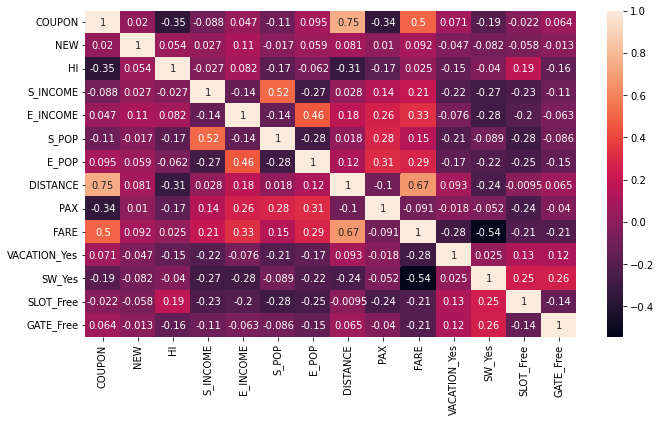

In [136]:
fig, ax = plt.subplots()
fig.set_size_inches(11,6)
sns.heatmap(df1_corr, annot=True)

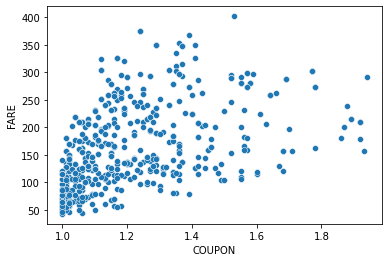

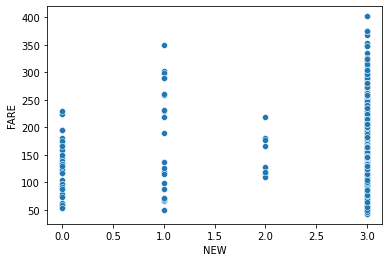

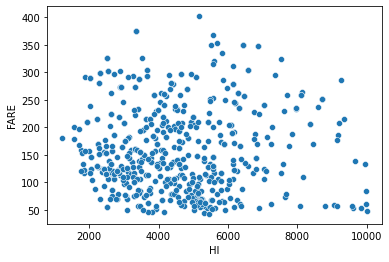

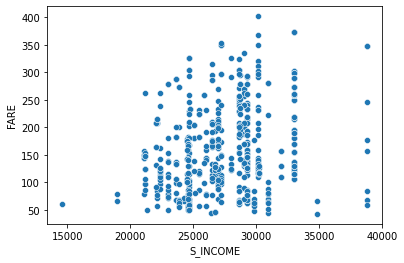

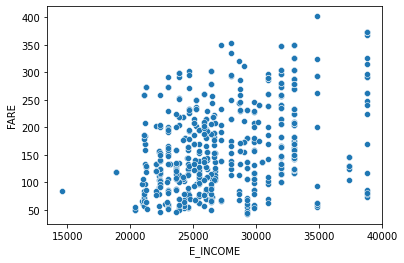

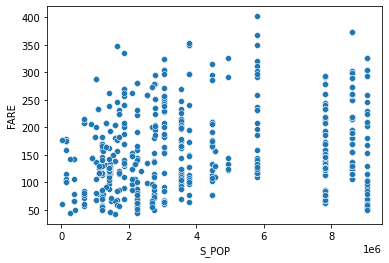

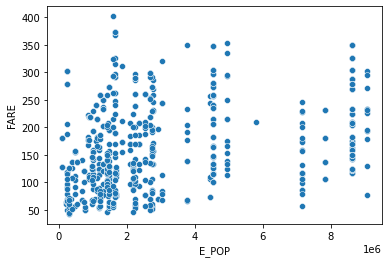

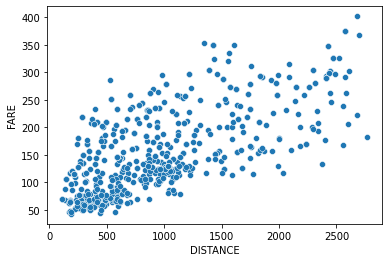

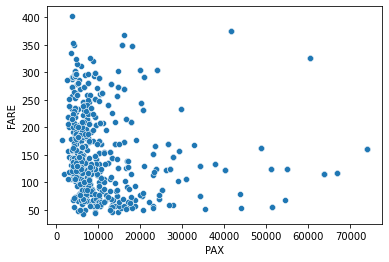

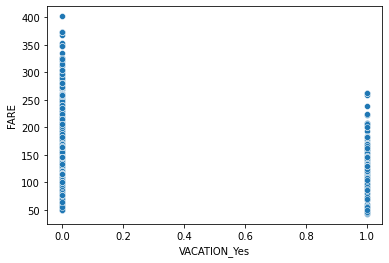

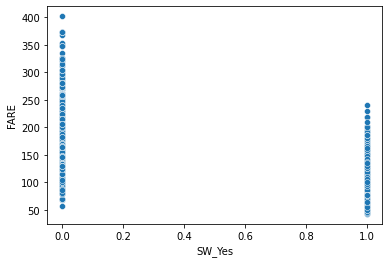

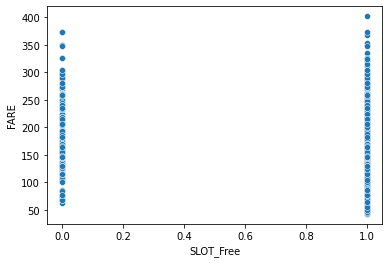

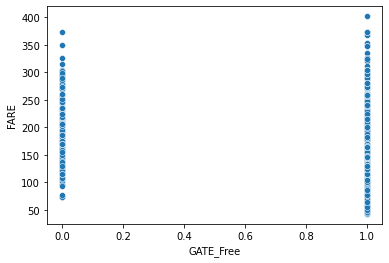

In [137]:
for p in predictors:
    sns.scatterplot(x=df1[p], y=df1[outcome])
    plt.show()

Question 3: What seems to be the best single predictor of FARE?

Answer:Distance

Question 4: Which variable(s) are at least 70% correlated?  Of those pairs, which variable would you remove from your model and why?  

In [101]:
df1.nunique()

COUPON           77
NEW               4
HI              452
S_INCOME         50
E_INCOME         67
S_POP            50
E_POP            68
DISTANCE        400
PAX             449
FARE            451
VACATION_Yes      2
SW_Yes            2
SLOT_Free         2
GATE_Free         2
dtype: int64

Answer:Distance and Coupon are at least 70% correlated. Of these pair, i would remove coupon because it is less correlated with fare than distance.

Question 5: Create a new data frame called “df2”. Remove the correlated variable(s) you identified in the previous question.

In [138]:
df2 = df1.drop(['COUPON'],axis=1)

Question 6: Conduct a PCA analysis on df2.

In [139]:
df2 = df2.loc[:, df2.columns != 'FARE']
pcs = PCA()
pcs.fit(df2.dropna(axis=0))
pcs.explained_variance_ratio_

array([6.47391219e-01, 3.52599110e-01, 7.93403245e-06, 9.90632560e-07,
       5.57046238e-07, 1.69200564e-07, 1.96104651e-08, 3.41570355e-14,
       1.16424364e-14, 1.12469330e-14, 8.41116860e-15, 5.28641435e-15])

In [140]:
pcsSummary = pd.DataFrame({'prop_variance':pcs.explained_variance_ratio_,
                           'cum_prop_variance':np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_tps = pcsSummary.transpose()
pcsSummary_tps.columns=['PC{}'.format(i) for i in range(1,len(pcsSummary_tps.columns)+1)]
pcsSummary_tps

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
prop_variance,0.647391,0.352599,0.000008,9.906326e-07,5.570462e-07,1.692006e-07,1.961047e-08,3.415704e-14,1.164244e-14,1.124693e-14,8.411169e-15,5.286414e-15
cum_prop_variance,0.647391,0.999990,0.999998,9.999993e-01,9.999998e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Question 7: At how many PC’s do you attain a cumulative proportion of over 70%? At how many PC’s do you attain a cumulative proportion of over 90%?

Answer: 11 PC’s have a cumulative proportion of over 70%. And same number for the cumulative proportion of over 90%.

## Section 2 – Linear Regressions

Question 8: Perform a full regression predicting the FARE using df2.  Your train validation split should be 60/40.  Your random seed should be your student ID number.  Fit your model to the validation data and generate error statistics.

In [141]:
train_x1, valid_x1, train_y1, valid_y1 = train_test_split(df2,df1[outcome], test_size=0.4, random_state=301250603)

airport_lm1 = LinearRegression()
airport_lm1.fit(train_x1, train_y1)

regressionSummary(train_y1, airport_lm1.predict(train_x1)) #we want low for every element in regression summary


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 34.6773
            Mean Absolute Error (MAE) : 27.1610
          Mean Percentage Error (MPE) : -4.8033
Mean Absolute Percentage Error (MAPE) : 20.5109


Question 9: Perform a full regression predicting the FARE using df1.  Your train validation split should be 60/40.  Your random seed should be your student ID number.  Fit your model to the validation data and generate error statistics.

In [142]:
x = df1.loc[:, df1.columns != 'FARE']
train_x2, valid_x2, train_y2, valid_y2 = train_test_split(x,df1[outcome], test_size=0.4, random_state=301250603)

airport_lm2 = LinearRegression()
airport_lm2.fit(train_x2, train_y2)

# print performance measures
regressionSummary(train_y2, airport_lm2.predict(train_x2)) #we want low for every element in regression summary


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 34.5720
            Mean Absolute Error (MAE) : 26.9957
          Mean Percentage Error (MPE) : -4.7325
Mean Absolute Percentage Error (MAPE) : 20.3598


Question 10: Perform a forward regression predicting the FARE using df1.  Your train validation split should be 60/40.  Your random seed should be your student ID number.  Fit your model to the validation data and generate error statistics.

In [143]:
from dmba import backward_elimination, forward_selection, stepwise_selection

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_x2[variables], train_y2)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y2, [train_y2.mean()] * len(train_y2), model, df=1)
    return AIC_score(train_y2, model.predict(train_x2[variables]), model)

best_forw_model, best_forw_variables = forward_selection(train_x.columns, train_model, score_model, verbose=True)
regressionSummary(valid_y2, best_forw_model.predict(valid_x2[best_forw_variables]))

Variables: COUPON, NEW, HI, S_INCOME, E_INCOME, S_POP, E_POP, DISTANCE, PAX, VACATION_Yes, SW_Yes, SLOT_Free, GATE_Free
Start: score=4394.45, constant
Step: score=4166.63, add DISTANCE
Step: score=4042.91, add SW_Yes
Step: score=3925.01, add VACATION_Yes
Step: score=3898.47, add HI
Step: score=3884.05, add GATE_Free
Step: score=3857.88, add SLOT_Free
Step: score=3851.86, add E_INCOME
Step: score=3839.67, add PAX
Step: score=3829.57, add S_POP
Step: score=3819.10, add E_POP
Step: score=3819.10, add None

Regression statistics

                      Mean Error (ME) : 0.7869
       Root Mean Squared Error (RMSE) : 36.3160
            Mean Absolute Error (MAE) : 28.5824
          Mean Percentage Error (MPE) : -3.7070
Mean Absolute Percentage Error (MAPE) : 21.6145


Question 11: Perform a backward regression predicting the FARE using df1.  Your train validation split should be 60/40.  Your random seed should be your student ID number.  Fit your model to the validation data and generate error statistics.

In [144]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_x2[variables], train_y2)
    return model

def score_model(model, variables):
    return AIC_score(train_y2, model.predict(train_x2[variables]), model)

best_back_model, best_back_variables = backward_elimination(train_x.columns, train_model, score_model, verbose=True)
regressionSummary(valid_y2, best_back_model.predict(valid_x2[best_back_variables]))

Variables: COUPON, NEW, HI, S_INCOME, E_INCOME, S_POP, E_POP, DISTANCE, PAX, VACATION_Yes, SW_Yes, SLOT_Free, GATE_Free
Start: score=3820.96
Step: score=3819.04, remove NEW
Step: score=3819.04, remove None

Regression statistics

                      Mean Error (ME) : 0.1576
       Root Mean Squared Error (RMSE) : 36.4457
            Mean Absolute Error (MAE) : 28.6632
          Mean Percentage Error (MPE) : -4.0944
Mean Absolute Percentage Error (MAPE) : 21.5160


Question 12: Which model is the best model and why?

Answer: Full regression with D1 is the best model in consideration with error statistics having lowest error rate than other.

Question 13: Discuss the insights revealed from your best model?  (Hint: This may require more coding steps.)

In [148]:
pred_y = airport_lm2.predict(train_x2)

print('adjusted r2 : ', adjusted_r2_score(train_y2, pred_y, airport_lm2)) #we want high R^2
print('AIC : ', AIC_score(train_y2, pred_y, airport_lm2))
print('BIC : ', BIC_score(train_y2, pred_y, airport_lm2)) #we want low AIC & BIC

adjusted r2 :  0.784464627582358
AIC :  3820.9556619217947
BIC :  3880.1369710508934


In [147]:
airport_lm_pred = airport_lm2.predict(valid_x2)

result = pd.DataFrame({'Predicted': airport_lm_pred, 'Actual': valid_y2,
                       'Residual': valid_y2 - airport_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y2, airport_lm_pred)

      Predicted  Actual   Residual
234  153.850722  159.71   5.859278
626  148.566925  132.94 -15.626925
145  180.854114  143.62 -37.234114
613  105.459354  125.80  20.340646
383  103.820965  114.95  11.129035
420  157.727267  218.54  60.812733
293   81.343649   58.03 -23.313649
160  110.667805   76.79 -33.877805
388   87.216882   65.84 -21.376882
557    6.776416   46.32  39.543584
617  271.598214  273.83   2.231786
563  130.403849  123.89  -6.513849
399  151.301140  140.07 -11.231140
29   136.052944  134.30  -1.752944
222  172.444402  162.28 -10.164402
486  275.458416  224.17 -51.288416
499  241.238737  325.02  83.781263
417   40.747267   42.47   1.722733
308  159.718729  201.43  41.711271
187  205.956273  190.09 -15.866273

Regression statistics

                      Mean Error (ME) : 0.1215
       Root Mean Squared Error (RMSE) : 36.3961
            Mean Absolute Error (MAE) : 28.6240
          Mean Percentage Error (MPE) : -4.1089
Mean Absolute Percentage Error (MAPE) : 21.4651


Answer:The highest residual for our best model is 83.78 within the range of 30 results. It has the mean eroor of 0.1215 and RMSE of 36.3962. The adjusted r2 is 0.784464627582358, AIC is 3820.9556619217947 and BIC is  3880.1369710508934